In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
from scipy.stats import norm
import seaborn as sns
import pandas as pd

In [3]:
def window_displacement(pos_concatenated, window_size):
    expe_length = pos_concatenated.shape[1] - window_size
    w_displacement_matrix = np.zeros((pos_concatenated.shape[0], expe_length))
#     print(w_displacement_matrix.shape)
    for row_index,row in enumerate(pos_concatenated):
        for i in range(window_size, len(row)):
            [xi, yi]=row[i-window_size].split(",")
            [xi, yi]=[float(xi), float(yi)]

            [xf, yf]=row[i].split(",")
            [xf, yf]=[float(xf), float(yf)]

            w_displacement=((xf - xi)/window_size)**2 + ((yf - yi)/window_size)**2
            w_displacement_matrix[row_index][i- window_size] += w_displacement
    w_displacement_array = np.mean(w_displacement_matrix, axis=0)
    return(w_displacement_array)

In [4]:
def plot_heatmap(dictionary, w_size):
    for key, value in dictionary.items():
        fig=plt.figure(figsize = (12, 8))
        dataFrame=pd.DataFrame.from_dict(value)
        reversed_df=dataFrame.iloc[::-1]
        ax=sns.heatmap(reversed_df, annot = True, fmt = ".2e")
        ax.set_title("Heatmap of WMSD for %s robots" % (key))
        ax.set_ylabel("alpha")
        ax.set_xlabel("rho")
        #plt.show()
        #Salva su file
        file_name="WMSD_%s_robots_wsize_%s_heatmap.png" % (key, w_size)
        plt.savefig(file_name)
    #     reversed_df.to_pickle(file_name[:-4] + ".pickle")

In [28]:
def plot_time_wmsd(w_displacement_array, w_size):
    fig=plt.figure(figsize=(12, 6), dpi= 160, facecolor='w', edgecolor='k')
    
    if(w_displacement_array.ndim == 2):
        times = np.arange(w_displacement_array.shape[1])*10
        for y in w_displacement_array:
            plt.plot(times, y)
    else:
        times = np.arange(w_displacement_array.size)*10
        plt.plot(times, w_displacement_array)
    
    plt.title('WMSD in time')
    plt.ylabel('w_displacement with window_size: %s' % w_size)
    plt.xlabel('time(s)')
    #     plt.show();
    plt.savefig("WMSD_in_time_wsize=%s" %w_size)

In [6]:
def print_help():
    print("usage : folder_path, window size (1 for 10, 2 for 20, ....)")

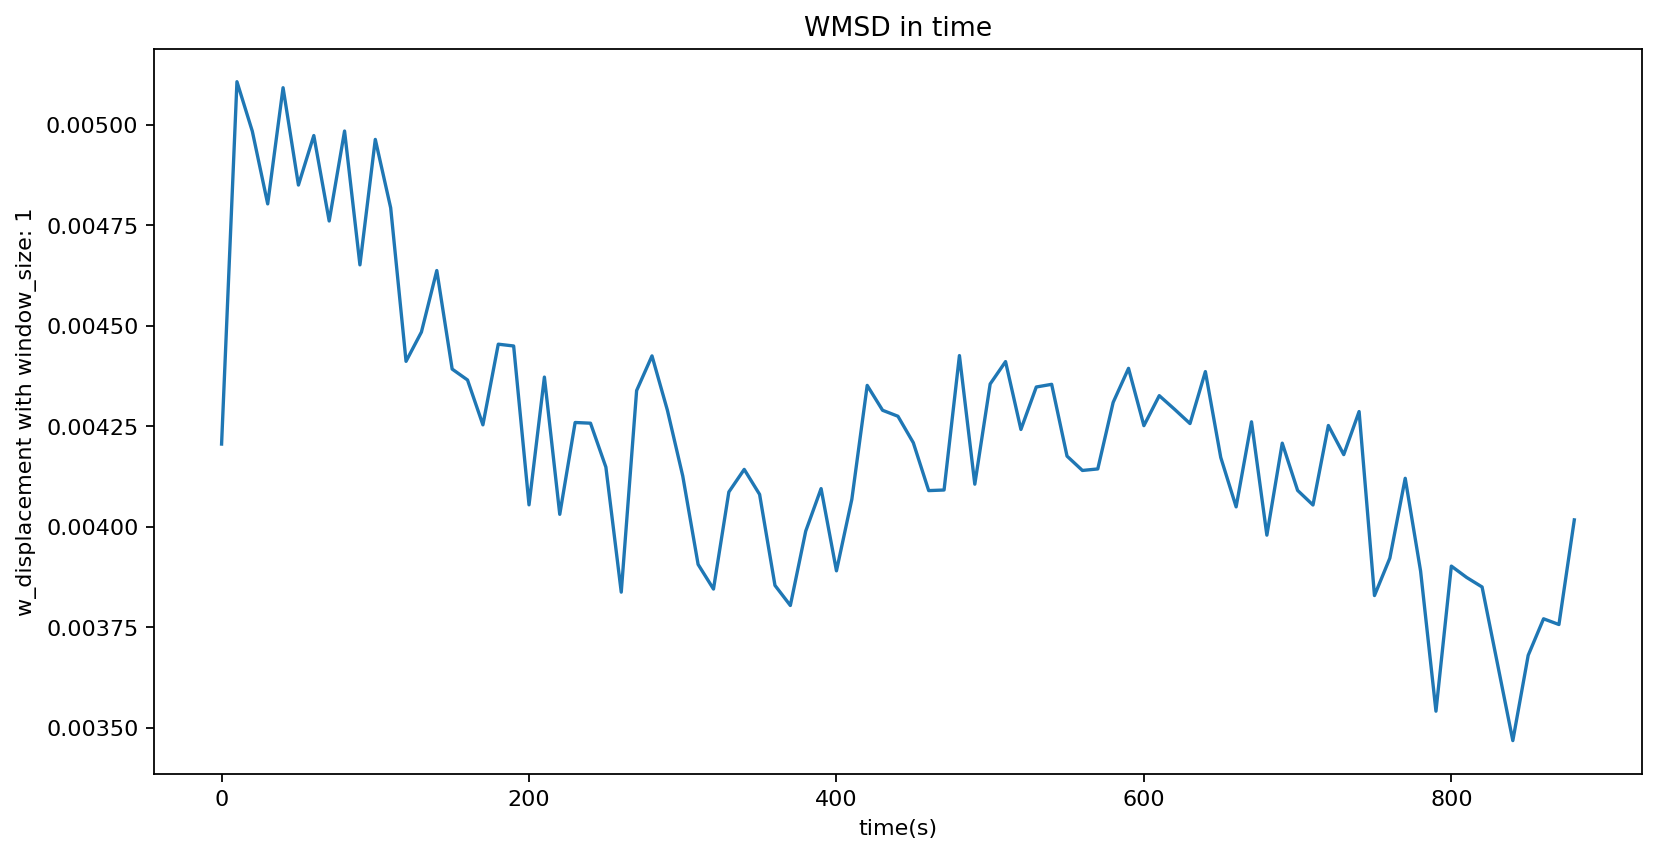

In [29]:
# def main():
folder = "/home/luigi/Documents/scripts/test_scripts/results_2020-01-17/2020-01-16_robots#50_alpha#1.2_rho#0.3_sim"
window_size = 1

#     number_of_args=len(sys.argv)

#     if (number_of_args < 3):
#         print_help()
#         exit(-1)

#     folder=sys.argv[1]
#     window_size=int(sys.argv[2])

count = 1
total_dict=dict()
number_dict=dict()
w_displacement_array = np.array([])
for dirName, subdirList, fileList in os.walk(folder):
    num_robots = "0"
    rho = -1.0
    alpha = -1.0
    elements=dirName.split("_")
    for e in elements:
        if e.startswith("robots"):
            num_robots=e.split("#")[-1]
            if(num_robots not in total_dict):
                total_dict[num_robots]=dict()
                number_dict[num_robots]=dict()

        if(e.startswith("rho")):
            rho=float(e.split("#")[-1])
        if(e.startswith("alpha")):
            alpha=float(e.split("#")[-1])

#     print(str(count) + " : " + dirName)
    if(num_robots == "0" or rho == -1.0 or alpha == -1):
        continue
    rho_str=str(rho)
    alpha_str=str(alpha)
    # print("rho", rho_str)
    # print("alpha", alpha_str)
    if(rho_str not in total_dict[num_robots]):
        total_dict[num_robots][rho_str]=dict()
        number_dict[num_robots][rho_str]=dict()
#         print(total_dict)
    count +=1

    df = pd.DataFrame()
    number_of_experiments = 0
    for file in fileList:
        if file.endswith('position.tsv'):
#             print(mean_wmsd)
#             print('Directory %s' % dirName)
#             print('\t\tfile %s' % file)
            df_single = pd.read_csv(dirName+"/"+file, sep="\t")
            df = df.append(df_single)
            number_of_experiments +=1
#     print(number_of_experiments)
    positions_concatenated = df.values[:,1:]
    if(w_displacement_array.size == 0):
        w_displacement_array = window_displacement(positions_concatenated, window_size)
        mean_wmsd = w_displacement_array.mean()
    else:
        w_2 = window_displacement(positions_concatenated, window_size)
        w_displacement_array = np.vstack([w_displacement_array,w_2])
        mean_wmsd = w_2.mean()


    total_dict[num_robots][rho_str][alpha_str]=mean_wmsd
    number_dict[num_robots][rho_str][alpha_str]=number_of_experiments

# plot_heatmap(total_dict, window_size)
# #     print(w_displacement_array)
plot_time_wmsd(w_displacement_array, window_size)

In [14]:
total_dict

{'50': {'0.3': {'1.2': 0.004231251655430713}}}

IndexError: tuple index out of range

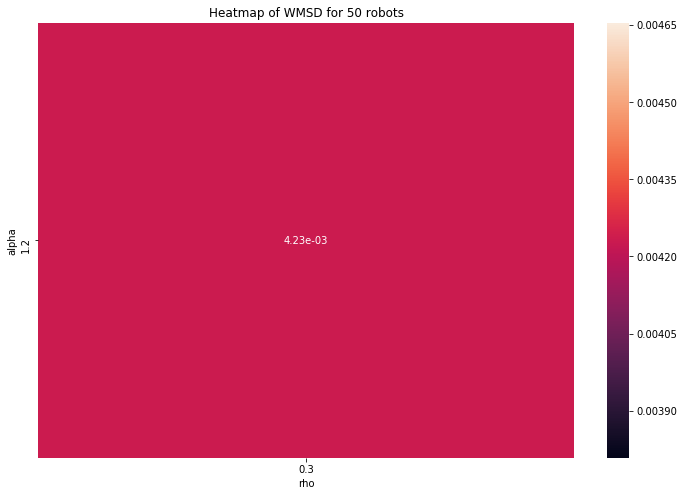

In [10]:
if __name__ == '__main__':
    main()